<a href="https://colab.research.google.com/github/Raph3103/DataStructureProject/blob/main/Copie_de_HW1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1 - Data Exploration and Preparation

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection

## Loading the dataset

In [177]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [178]:
dataset = pd.read_csv(filename)

In [179]:
dataset.shape
dataset_for_test = dataset.copy()

# How to download from Colab?

In [180]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [181]:
#Q2
dataset['conversations_per_day'].value_counts()

conversations_per_day
3     218
2     204
5     179
4     168
1     108
6     107
7      94
8      54
9      42
10     29
11     16
13      8
12      7
14      6
16      5
15      3
17      1
29      1
Name: count, dtype: int64

In [182]:
#Q4
sum_tz = 62 + 8
trainingSet,testSet=model_selection.train_test_split(dataset, train_size=0.8, test_size=0.2, random_state=sum_tz)


In [183]:
#Q5
trainingSet.isnull().sum()


patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         86
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

In [184]:
testSet.isnull().sum()

patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         23
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64

<Axes: >

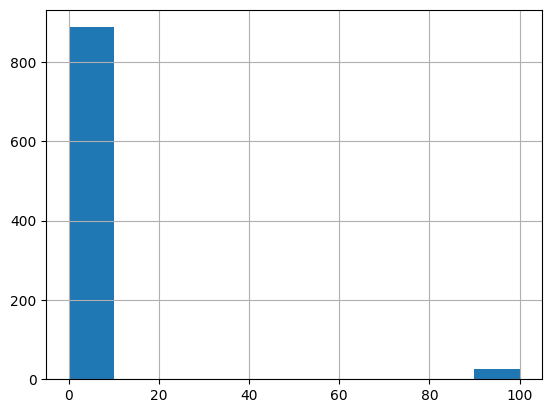

In [185]:
trainingSet['household_income'].hist()

In [186]:
trainingSet['household_income'].mean()

3.6426695842450774

In [187]:
trainingSet['household_income'].median()

0.7

In [188]:
trainingSet['household_income'].fillna(trainingSet['household_income'].median(), inplace=True)
testSet['household_income'].fillna(testSet['household_income'].median(), inplace=True)


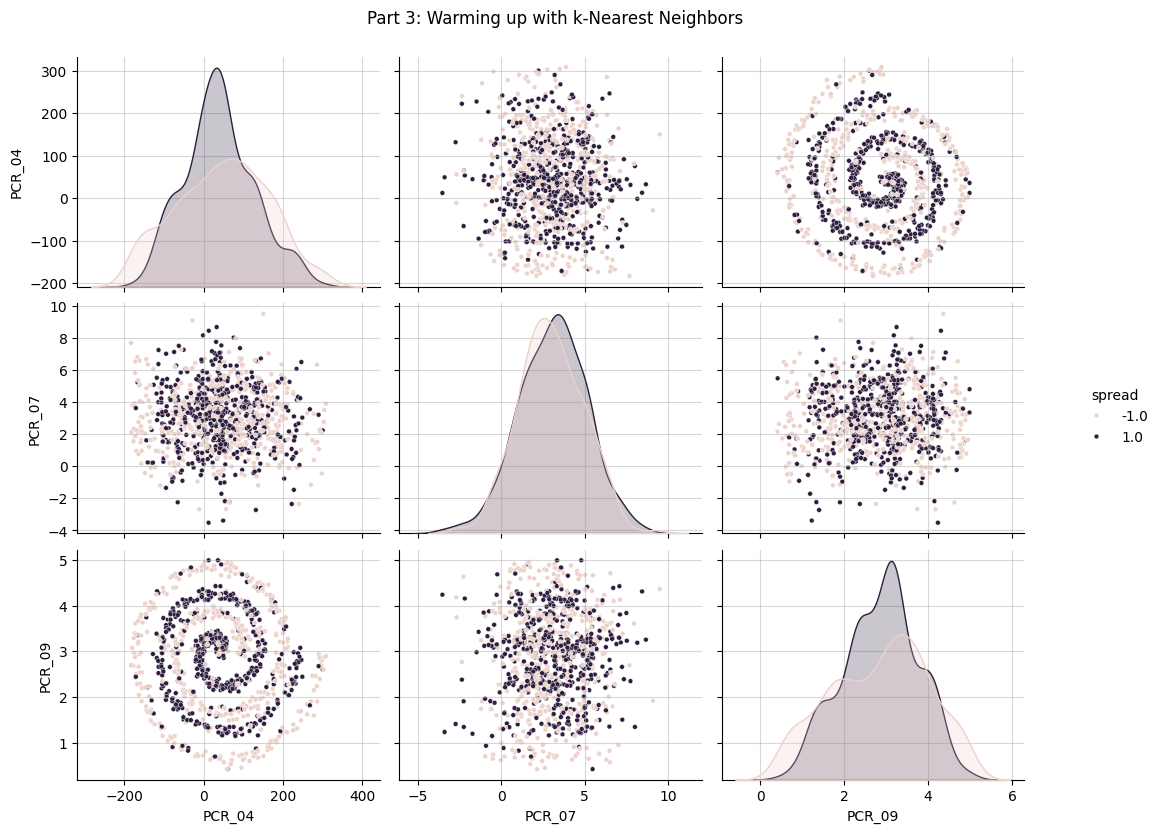

In [189]:
#Task B
g=sns.pairplot(trainingSet[["spread","PCR_04","PCR_07","PCR_09"]], plot_kws={"s": 12},hue="spread")
g.fig.suptitle("Part 3: Warming up with k-Nearest Neighbors ", y=1.04)

for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)

g.fig.set_size_inches(12,8)


In [190]:
#Task C
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial.distance import cdist
class kNN(BaseEstimator, ClassifierMixin):
  def __init__(self, n_neighbors:int = 3):
    self.n_neighbors = n_neighbors
    self.train_x = None
    self.train_y = None

  def fit(self, X, y):
    self.train_x = X.copy()
    self.train_y = y.copy()
    return self

  def predict(self, X):
      distances = cdist(X, self.train_x)
      minDictances = self.train_y.to_numpy()[distances.argpartition(self.n_neighbors)]
      predictions = [np.sign(sum(row[:self.n_neighbors])) for row in minDictances]
      return np.asarray(predictions)



In [191]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


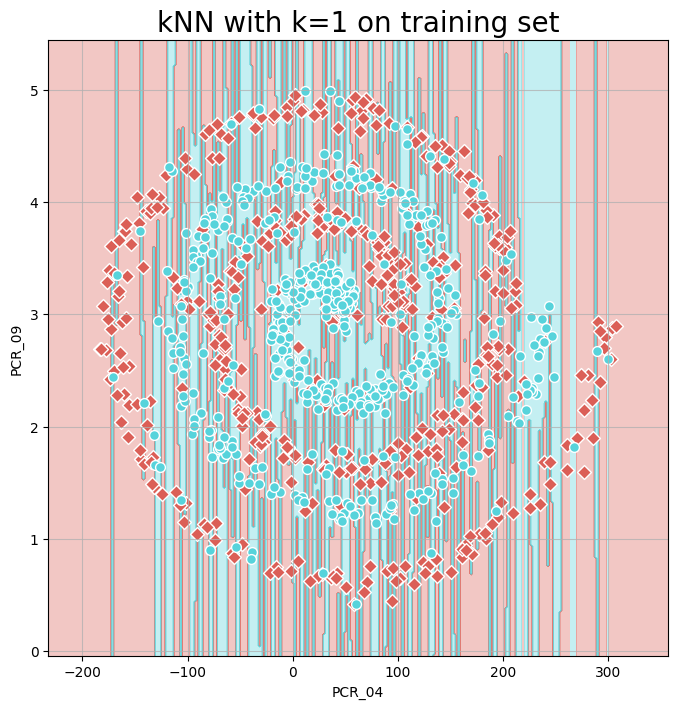

1.0

In [192]:
#Task D
xTraining,yTraining=trainingSet[["PCR_04","PCR_09"]],trainingSet["spread"]
knnTest = kNN(1)
knnTest.fit(xTraining,yTraining)
visualize_clf(knnTest,xTraining,yTraining,"kNN with k=1 on training set","PCR_04","PCR_09")
knnTest.score(xTraining,yTraining)

In [193]:
knnTest.score(testSet[["PCR_04","PCR_09"]],testSet["spread"])

0.584

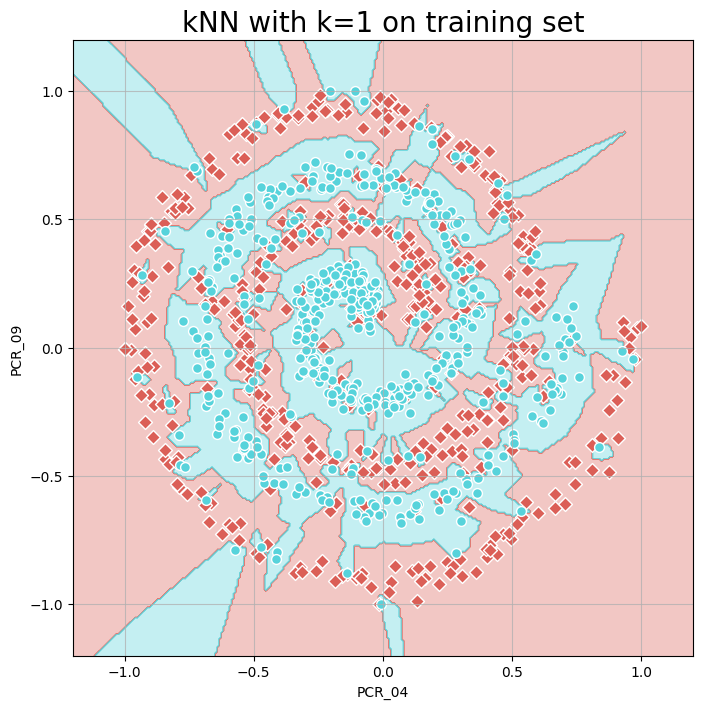

The score of knn with k = 1 after normalization is:  1.0


In [194]:
#Q11
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(-1,1))
fittedXTraining=Scaler.fit_transform(xTraining)

knnTestMinMaxFit = kNN(1)
knnTestMinMaxFit.fit(fittedXTraining,yTraining)
visualize_clf(knnTestMinMaxFit,fittedXTraining,yTraining,"kNN with k=1 on training set","PCR_04","PCR_09")
knnTestMinMaxFit.score(fittedXTraining,yTraining)

knn1_scaled = kNN(1).fit(fittedXTraining, yTraining)
print("The score of knn with k = 1 after normalization is: ", knn1_scaled.score(fittedXTraining, yTraining))

In [195]:
knn1_scaled.score(Scaler.fit_transform(testSet[["PCR_04","PCR_09"]]),testSet["spread"])

0.724

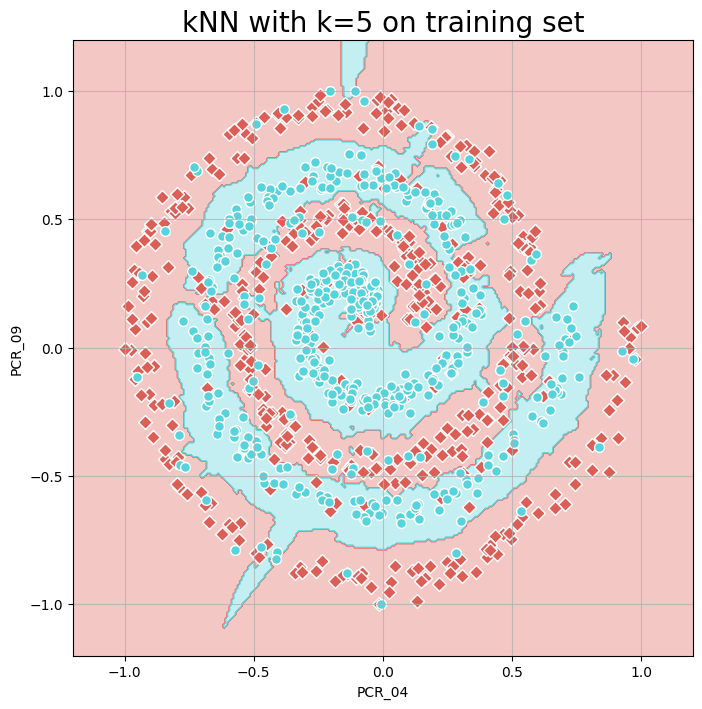

The score of knn with k = 5 after normalization is:  0.85


In [196]:
knn_five_TestMinMaxFit = kNN(5)
knn_five_TestMinMaxFit.fit(fittedXTraining,yTraining)
visualize_clf(knn_five_TestMinMaxFit,fittedXTraining,yTraining,"kNN with k=5 on training set","PCR_04","PCR_09")
knn_five_TestMinMaxFit.score(fittedXTraining,yTraining)

knn5_scaled = kNN(5).fit(fittedXTraining, yTraining)
print("The score of knn with k = 5 after normalization is: ", knn5_scaled.score(fittedXTraining, yTraining))

In [197]:
knn5_scaled.score(Scaler.fit_transform(testSet[["PCR_04","PCR_09"]]),testSet["spread"])

0.792

In [198]:
#Task E

dataset['SpecialProperty'] = dataset["blood_type"].isin(["O+", "B+"])
del dataset['blood_type']


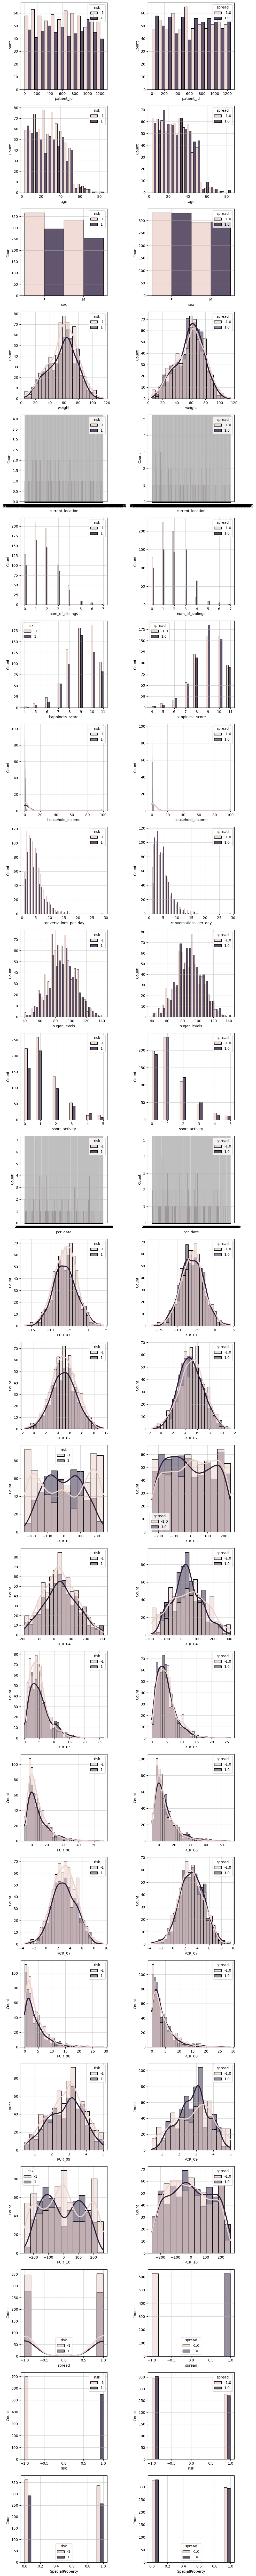

In [199]:

COL_NAME = dataset.columns.values
COLS, ROWS = (2, len(COL_NAME))

plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
  column = COL_NAME[row]

  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)

    isContinuous = "float" in dataset[column].dtype.name
    sns.histplot(data=dataset, x=column, hue=cls, line_kws={"linewidth": 3},
                 kde=isContinuous, multiple="layer" if isContinuous else "dodge")
    plt.grid(alpha=0.5)

plt.tight_layout()


In [200]:
trainingSet['SpecialProperty'] = trainingSet["blood_type"].isin(["O+", "B+"])
del trainingSet['blood_type']
trainingSet.head()

patient_id  age sex  weight            current_location  \
266           88   49   M    58.3      ('9.6531', '124.3697')   
672         1145   43   M    81.8    ('38.55632', '69.01354')   
1146         429   44   F    74.3    ('29.69221', '72.54566')   
511         1006   40   F    66.5     ('53.37596', '51.3452')   
956          402   12   F    48.0  ('33.95015', '-118.03917')   

      num_of_siblings  happiness_score  household_income  \
266                 2               10               0.8   
672                 0                8               0.9   
1146                1                8               0.8   
511                 3                8               0.7   
956                 1                8               0.9   

      conversations_per_day  sugar_levels  ...      PCR_04     PCR_05  \
266                       2            73  ... -113.984964   1.946759   
672                       2           107  ...  141.860601   1.544213   
1146                      3            94  ...    1.487754  11.030037   
511                       2            78  ...  130.953223   4.101777   
956                       1            75  ...  190.784770   5.312970   

         PCR_06    PCR_07    PCR_08    PCR_09      PCR_10  spread  risk  \
266   12.804387  0.938710  2.793360  3.337077   82.978768    -1.0    -1   
672   11.044430  3.053743  4.776056  4.507166 -131.474049    -1.0     1   
1146  12.831729  2.955078  3.377155  2.456384 -222.636238     1.0    -1   
511    7.565324  5.148369  7.686947  4.407121   10.051358     1.0    -1   
956   12.637229 -0.086211  2.129587  3.883127   -1.675646    -1.0    -1   

      SpecialProperty  
266             False  
672              True  
1146            False  
511             False  
956             False  

[5 rows x 25 columns]

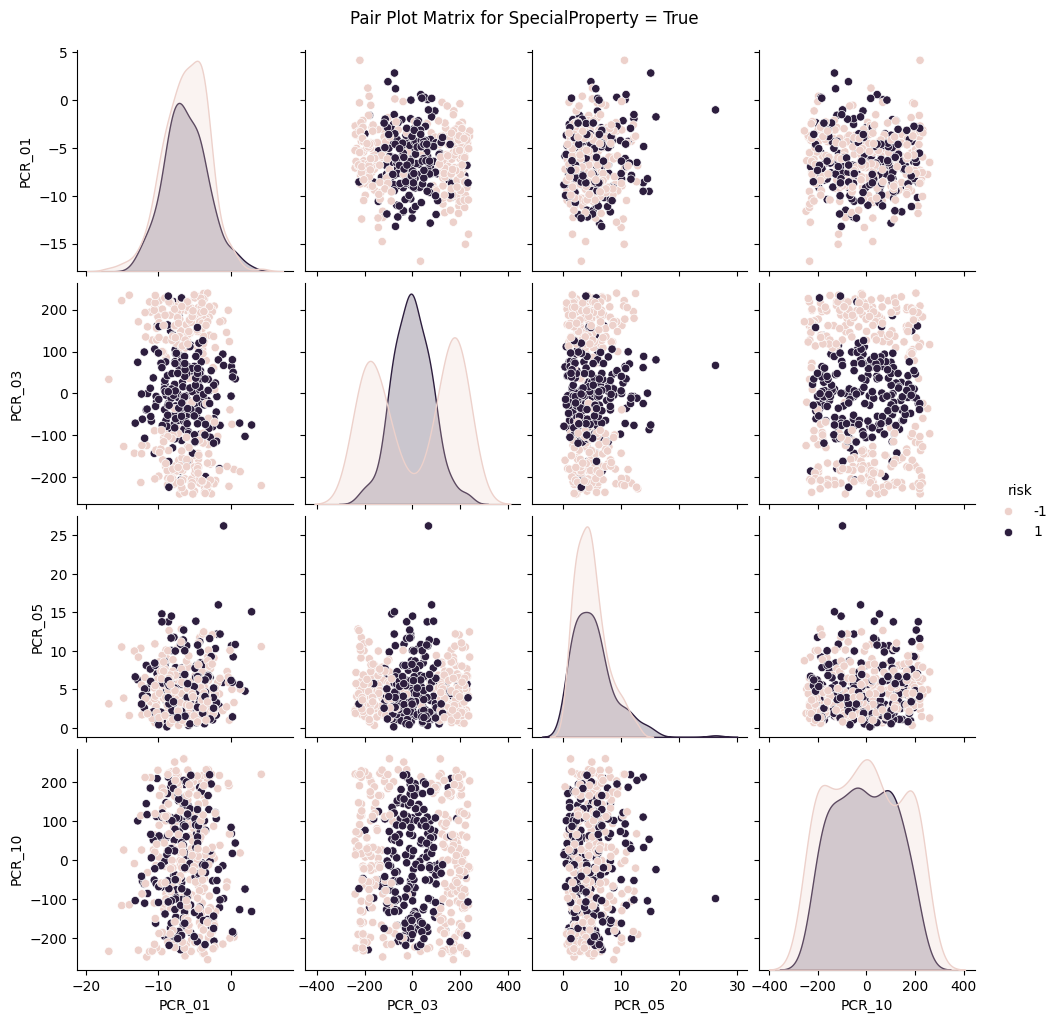

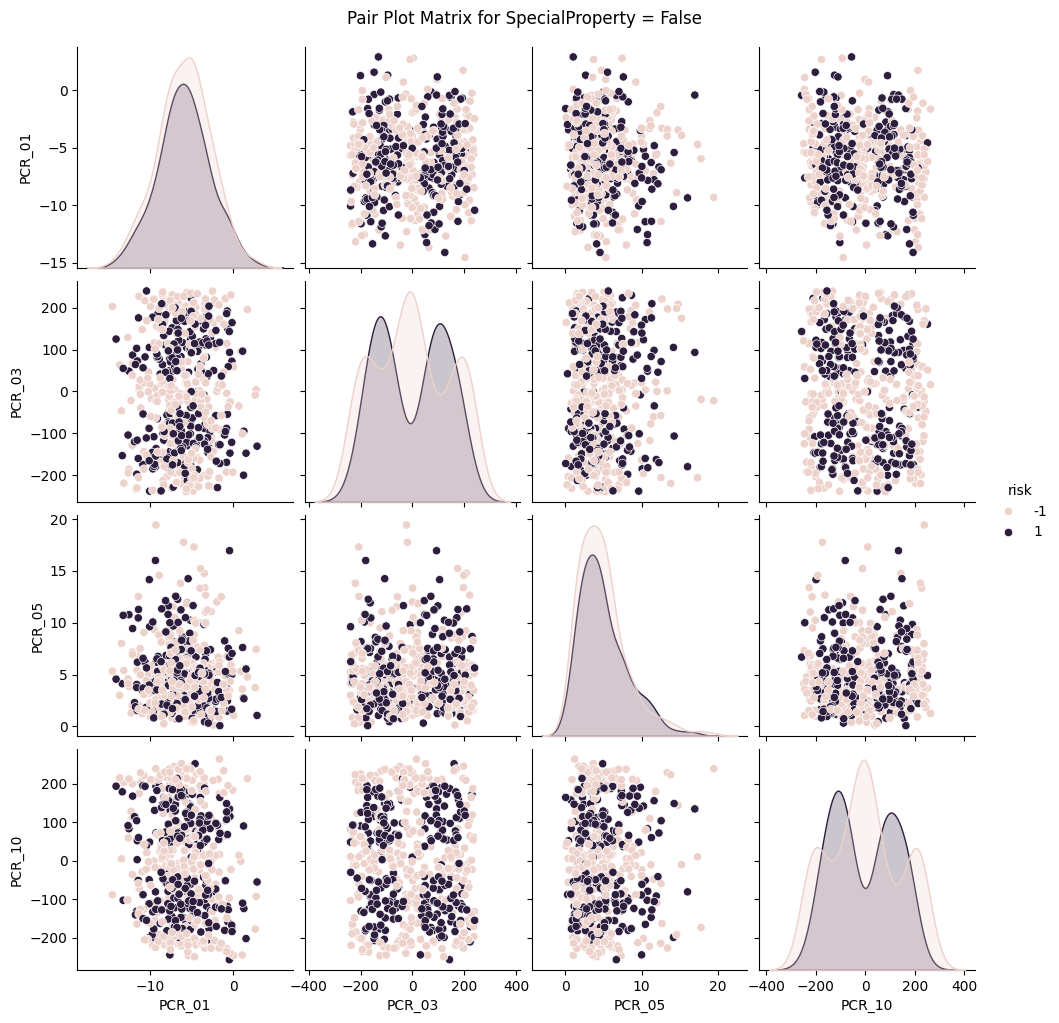

In [201]:

false_dataset = trainingSet[trainingSet['SpecialProperty'] == 0]
true_dataset = trainingSet[trainingSet['SpecialProperty'] == 1]

pcr_features = ['PCR_01', 'PCR_03', 'PCR_05', 'PCR_10']

def create_pair_plot_matrix(data, features, title):
    sns.pairplot(data[features + ['risk']], hue='risk')
    plt.suptitle(title, y=1.02)
    plt.show()

create_pair_plot_matrix(true_dataset, pcr_features, 'Pair Plot Matrix for SpecialProperty = True')
create_pair_plot_matrix(false_dataset, pcr_features, 'Pair Plot Matrix for SpecialProperty = False')

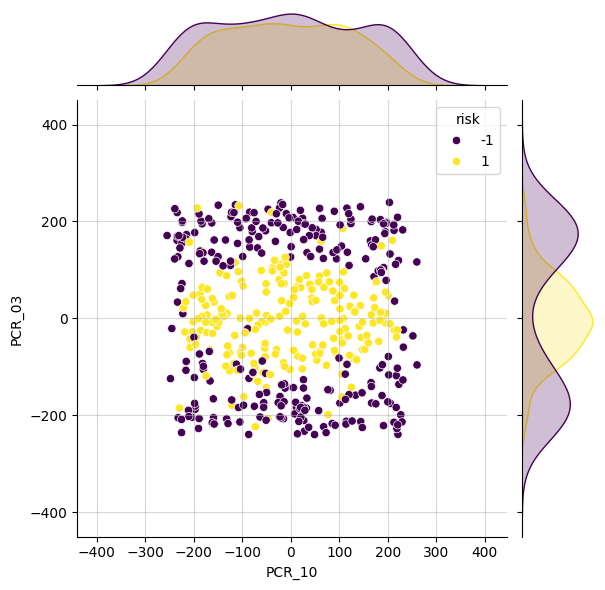

In [202]:

g = sns.jointplot(data=true_dataset, x="PCR_10", y="PCR_03", hue="risk",palette= "viridis")
_ = g.ax_joint.grid(alpha=0.5)

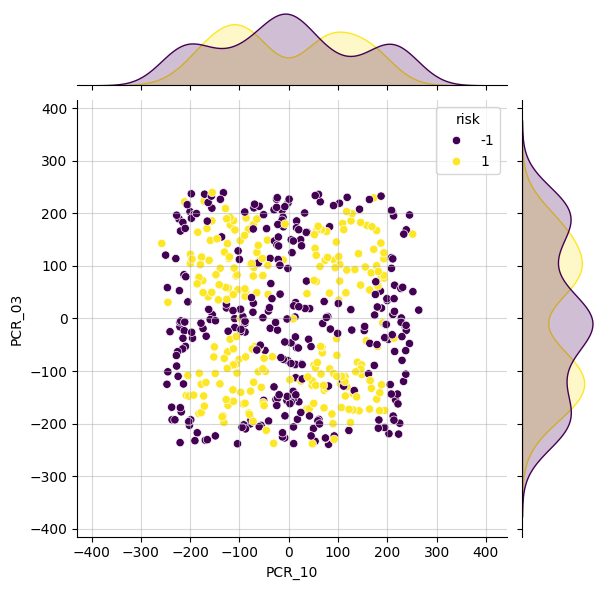

In [203]:
g = sns.jointplot(data=false_dataset, x="PCR_10", y="PCR_03", hue="risk",palette= "viridis")
_ = g.ax_joint.grid(alpha=0.5)

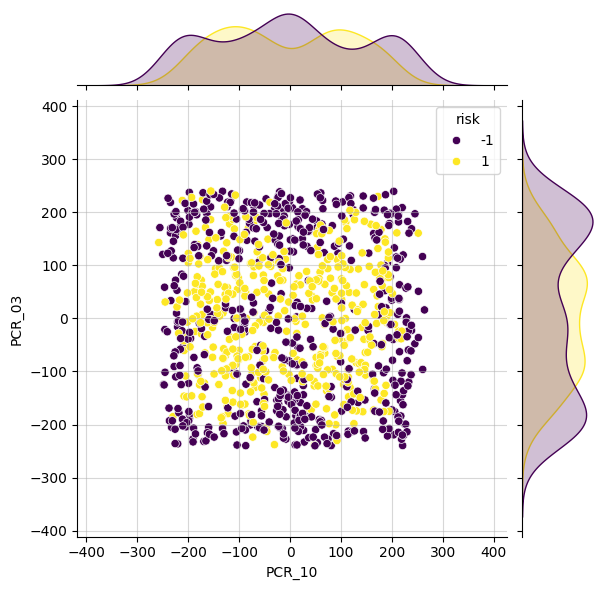

In [204]:
g = sns.jointplot(data=trainingSet, x="PCR_10", y="PCR_03", hue="risk",palette= "viridis")
_ = g.ax_joint.grid(alpha=0.5)

In [205]:
def plot3d(df, colX, colY, colZ, title, hue=None, s=1):
  %matplotlib inline

  fig = plt.figure(figsize=(20, 4))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=s)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=s)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=s)

    if i == 3 or i == 1:
      ax.set_xlabel(colX, labelpad=20)
      ax.set_ylabel(colY, labelpad=20)
    else:
      ax.xaxis.set_ticklabels([])
      ax.yaxis.set_ticklabels([])

    ax.view_init(elev=5., azim=45*i+15)

  axes[1].set_zlabel("\n" + colZ, labelpad=1)

  plt.suptitle(title)
  plt.subplots_adjust(wspace=0.1, top=0.99)
  plt.show()

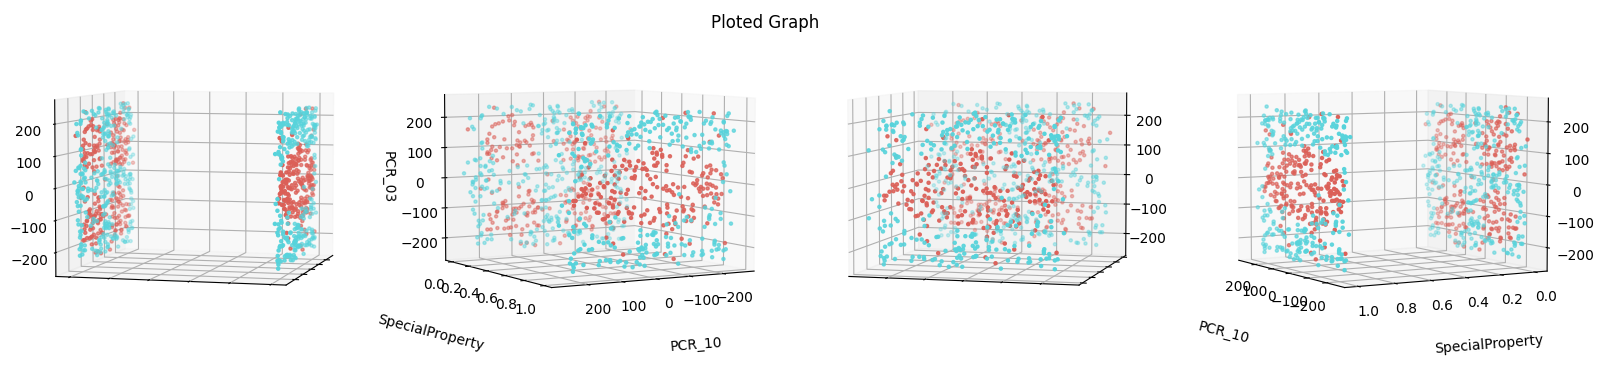

In [206]:
plot3d(trainingSet, "PCR_10", "SpecialProperty", "PCR_03", title="Ploted Graph", hue="risk", s=5)

In [207]:
#Task F
from types import prepare_class
from sklearn.preprocessing import StandardScaler
#Task H

def prepare_data(training_data, new_data):

  trainingSet,testSet=model_selection.train_test_split(training_data, train_size=0.8, test_size=0.2, random_state=70)
  prepared_data=new_data.copy()
  to_standart_norm=["PCR_01","PCR_02","PCR_04","PCR_05","PCR_06","PCR_07","PCR_08","PCR_09"]
  to_min_max_norm=["PCR_03","PCR_10"]
  trainingSet['SpecialProperty'] = trainingSet["blood_type"].isin(["O+", "B+"])
  del trainingSet['blood_type']
  prepared_data['SpecialProperty'] = prepared_data["blood_type"].isin(["O+", "B+"])
  del prepared_data['blood_type']

  standart_scaler=StandardScaler()
  standart_scaler.fit(trainingSet[to_standart_norm])
  prepared_data[to_standart_norm]=standart_scaler.transform(prepared_data[to_standart_norm])

  minmax_scaler=MinMaxScaler(feature_range=(-1,1))
  minmax_scaler.fit(trainingSet[to_min_max_norm])
  prepared_data[to_min_max_norm]=minmax_scaler.transform(prepared_data[to_min_max_norm])
  return prepared_data

  # Prepare training set according to itself
train_df_prepared = prepare_data(trainingSet, trainingSet)

# Prepare test set according to the raw training set
test_df_prepared = prepare_data(trainingSet, testSet)



KeyError: 'blood_type'